# Seaborn

### 什么是 Seaborn

Seaborn 是一个基于 Matplotlib 的 Python 可视化库。它提供了一个更高级的接口，用于绘制精美且信息丰富的统计图形。

  * **高级接口**：用更少的代码制作复杂的图表。
  * **数据感知**：能很好地与 Pandas 的 DataFrame 配合使用。
  * **风格美观**：默认样式比 Matplotlib 更漂亮。

**应用场景**

当你需要快速探索数据、理解变量之间的关系或制作用于报告的专业图表时，Seaborn 是一个绝佳的选择。

### 解决中文和负号显示问题

Matplotlib 默认不支持中文，且可能将负号显示为方框。可以通过 `rcParams` 修改全局配置，并**根据操作系统和当前实际已安装的字体自动选择合适的中文字体**来解决。

* 通过 `rcParams` 设置全局字体和负号显示：
  * 在 **Windows** 下，从 `SimHei`、`Microsoft YaHei` 等常见中文字体中自动选择可用的一个；
  * 在 **macOS** 下，从 `PingFang SC`、`Songti SC`、`STHeiti`、`Hiragino Sans GB` 等系统常见中文字体中自动选择可用的一个；
  * 若找不到候选字体，则使用默认字体（此时中文可能显示为方框）；
  * 通过 `rcParams["axes.unicode_minus"] = False` 解决负号显示为方框的问题。

示例代码（自动判断系统并选择可用的中文字体）：

使用字体: Songti SC


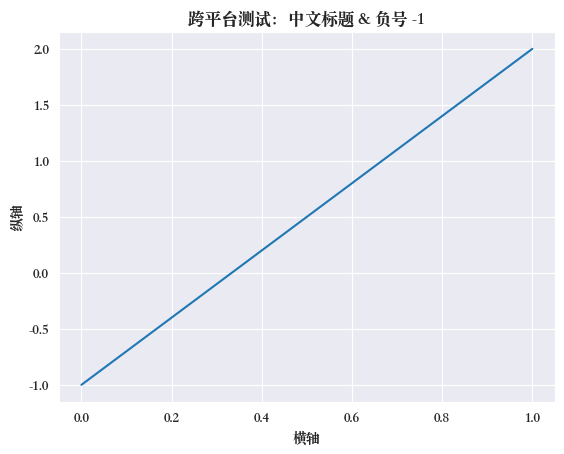

In [7]:
import sys
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager

def pick_font(candidates):
    """从候选字体列表中选出当前系统里存在的第一个"""
    available = {f.name for f in font_manager.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

# 不同系统下的中文字体候选列表
if sys.platform.startswith("win"):
    # Windows 上常见的中文字体
    candidate_fonts = [
        "SimHei",           # 黑体
        "Microsoft YaHei",  # 微软雅黑
        "MS Gothic"
    ]
elif sys.platform == "darwin":
    # macOS 上常见的中文字体（按你机器实际情况为准）
    candidate_fonts = [
        "PingFang SC",
        "Heiti SC",
        "STHeiti",
        "Songti SC",
        "Hiragino Sans GB",
        "Noto Sans CJK SC",
    ]
else:
    # 其他系统，比如 Linux，可以再补充
    candidate_fonts = [
        "Noto Sans CJK SC",
        "SimHei",
        "WenQuanYi Zen Hei"
    ]

font_name = pick_font(candidate_fonts)

if font_name:
    print(f"使用字体: {font_name}")
    rcParams["font.sans-serif"] = [font_name]
    rcParams["font.family"] = "sans-serif"
else:
    print("⚠ 没找到候选中文字体，将使用默认字体（中文可能显示为方框）。")

# 解决负号显示为方框
rcParams["axes.unicode_minus"] = False

# ==== 测试 ====
plt.plot([0, 1], [-1, 2])
plt.title("跨平台测试：中文标题 & 负号 -1")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.show()


### 准备工作：加载数据

使用 `penguins`（企鹅）数据集。在开始绘图前，先加载并准备数据。

#### penguins 数据集字段说明

penguins 数据集包含南极企鹅的体型与分类信息，共 7 个字段：

| 字段名             | 含义说明                           | 类型/取值示例                                               |
| ------------------ | ---------------------------------- | ----------------------------------------------------------- |
| `species`          | 企鹅种类                           | 分类变量：`Adelie`、`Gentoo`、`Chinstrap`                  |
| `island`           | 观测地点所在岛屿                   | 分类变量：`Torgersen`、`Biscoe`、`Dream`                   |
| `bill_length_mm`   | 喙（嘴）长度，单位为毫米           | 数值型，如 `39.1`（mm）                                    |
| `bill_depth_mm`    | 喙深度，单位为毫米                 | 数值型，如 `18.7`（mm）                                    |
| `flipper_length_mm`| 脚蹼长度，单位为毫米               | 数值型，如 `181`（mm）                                     |
| `body_mass_g`      | 体重，单位为克                     | 数值型，如 `3750`（g）                                     |
| `sex`              | 性别                               | 分类变量：`Male`、`Female`                                 |


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
penguins = pd.read_csv("data/penguins.csv")
# 丢弃包含缺失值的行
penguins.dropna(inplace=True)

# 查看数据信息
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### 单变量可视化（看一个变量的分布）

#### 1. 直方图 (histplot)

直方图用于显示一个数值变量的数据分布。它将数据分成若干“桶”（bins），然后统计每个桶里有多少个数据点。

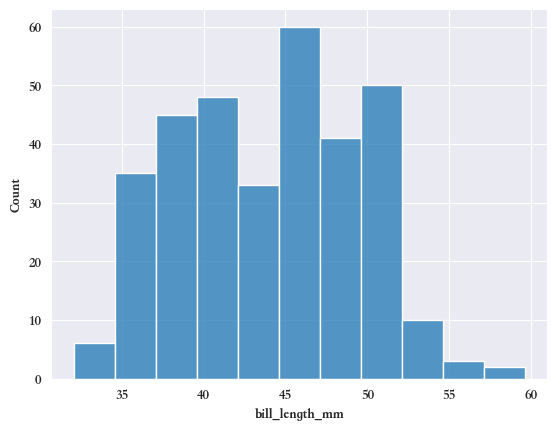

In [9]:
# 绘制企鹅喙长度（bill_length_mm）的分布
sns.histplot(data=penguins, x="bill_length_mm")
plt.show()

#### 2. 核密度估计图 (kdeplot)

核密度估计（KDE）图可以看作是直方图的“平滑”版本。它用一条连续的曲线来估计数据的概率密度，显示数据在哪些地方更集中。

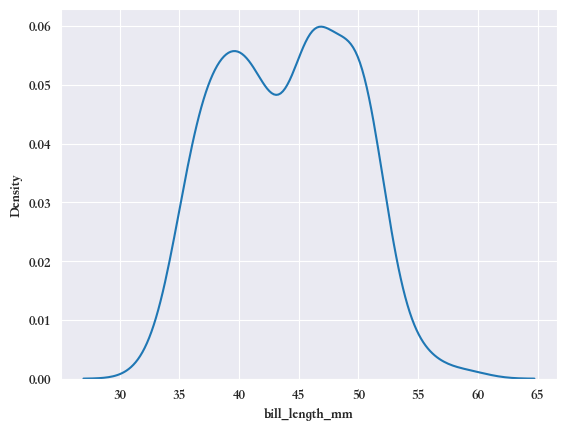

In [10]:
# 绘制喙长度的核密度估计图
sns.kdeplot(data=penguins, x="bill_length_mm")
plt.show()

> **提示**：你也可以在 `histplot` 中同时显示 KDE 曲线：
> `sns.histplot(data=penguins, x="bill_length_mm", kde=True)`

#### 3. 计数图 (countplot)

计数图专门用于统计分类变量中每个类别的出现次数。

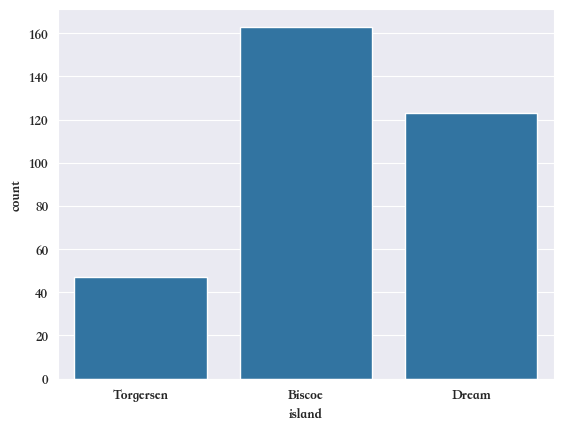

In [11]:
# 统计每个岛上有多少只企鹅
sns.countplot(data=penguins, x="island")
plt.show()

### 双变量可视化（看两个变量的关系）

#### 1. 散点图 (scatterplot)

散点图用于展示两个数值变量之间的关系。每个数据点在图上对应一个 (x, y) 坐标。

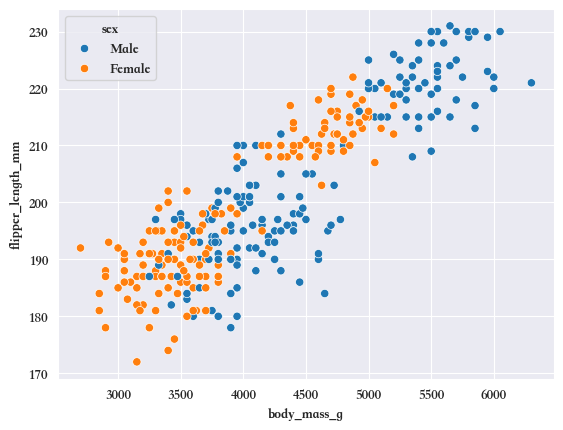

In [12]:
# 探索体重(x)和脚蹼长度(y)的关系
# 使用 hue="sex" 按性别区分颜色
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="sex")
plt.show()

#### 2. 回归图 (regplot / lmplot)

回归图在散点图的基础上，增加了一条线性回归拟合线，用于展示两个变量之间的线性趋势。

  * `regplot`：提供快速的回归拟合。
  * `lmplot`：功能更强大，可以方便地结合 `hue`（颜色）和 `col`（分面）来展示多组数据的回归趋势。

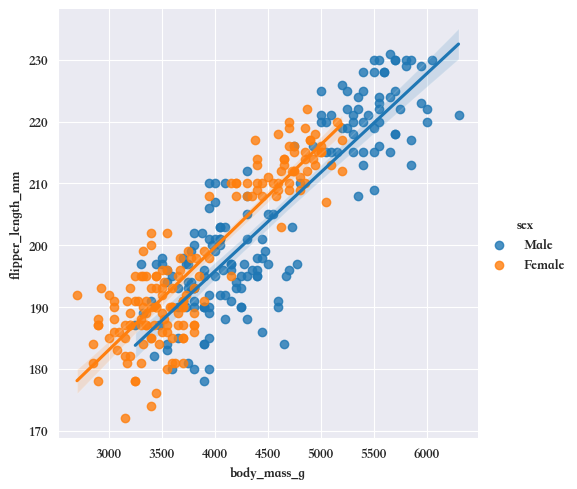

In [13]:
# 按性别(hue)分别展示体重和脚蹼长度的回归趋势
sns.lmplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="sex")
plt.show()

#### 3. 联合分布图 (jointplot)

联合分布图（Joint Plot）将两个变量的散点图（或关系图）与各自的单变量分布图（如直方图）组合在一起。

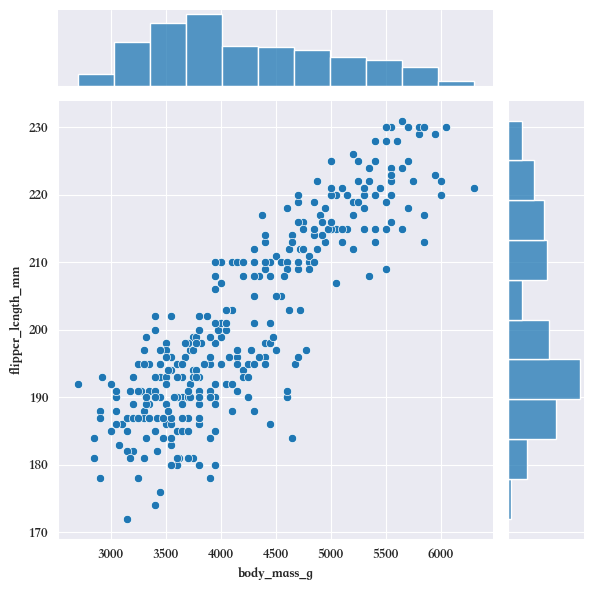

In [14]:
# 查看体重和脚蹼长度的联合分布
# 中间是散点图，上边和右边是各自的直方图
sns.jointplot(data=penguins, x="body_mass_g", y="flipper_length_mm")
plt.show()

#### 4. 蜂窝图 (jointplot, kind="hex")

当数据点非常多时，散点图会重叠成一团黑。蜂窝图（Hexbin Plot）是一种解决方案，它将平面划分为六边形，并根据落入每个六边形的数据点数量来着色。

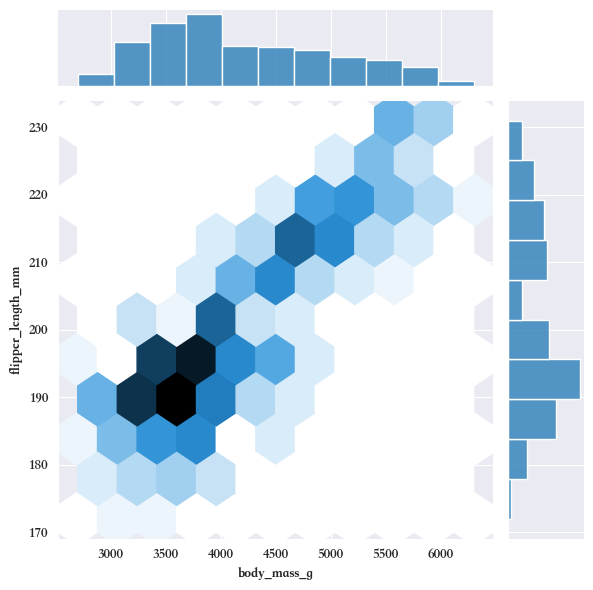

In [15]:
# 使用 kind="hex" 绘制蜂窝图
sns.jointplot(data=penguins, x="body_mass_g", y="flipper_length_mm", kind="hex")
plt.show()

#### 5. 二维核密度估计图 (kdeplot)

KDE 图的二维版本，用等高线或阴影来展示两个数值变量的数据密度，就像一张“数据热力图”。

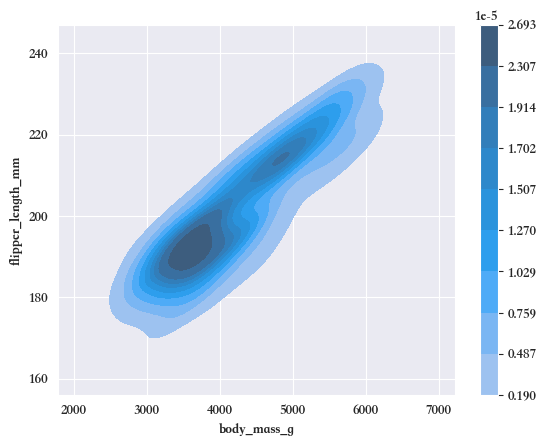

In [16]:
# 绘制体重和脚蹼长度的二维KDE图
# fill=True 表示填充颜色，cbar=True 显示颜色条
sns.kdeplot(data=penguins, x="body_mass_g", y="flipper_length_mm", fill=True, cbar=True)
plt.show()

#### 6. 条形图 (barplot)

条形图（Bar Plot）展示了一个类别变量和一个数值变量的关系。它默认会计算数值变量在每个类别下的**平均值**（或其他统计量），并显示一个误差条（代表置信区间）。

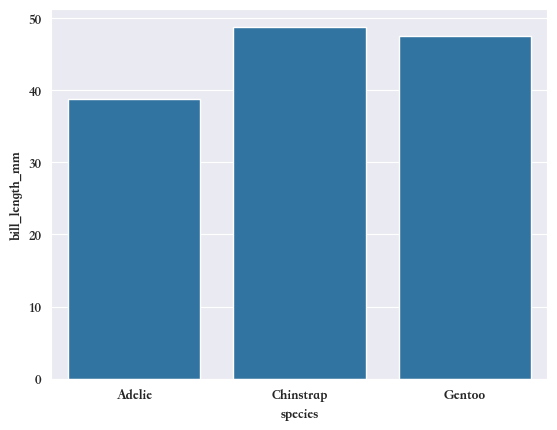

In [17]:
# 计算并展示每个企鹅种类(x)的平均喙长度(y)
# errorbar=None 表示不显示误差条，让图形更简洁
sns.barplot(data=penguins, x="species", y="bill_length_mm", errorbar=None)
plt.show()

#### 7. 箱线图 (boxplot)

箱线图（Box Plot）用于展示数据分布的“五数概括”：最小值、第一四分位数 (Q1)、中位数 (Q2)、第三四分位数 (Q3) 和最大值。它也能直观地显示异常值。

  * **箱体**：代表数据中间 50% 的范围（从 Q1 到 Q3）。
  * **箱内横线**：中位数。
  * **“胡须”**：代表数据的正常范围。
  * **点**：超出胡须范围的异常值。

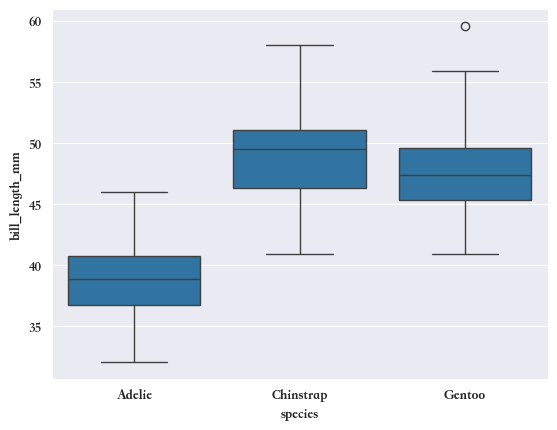

In [18]:
# 比较不同种类企鹅(x)的喙长度(y)分布
sns.boxplot(data=penguins, x="species", y="bill_length_mm")
plt.show()

#### 8. 小提琴图 (violinplot)

小提琴图（Violin Plot）是箱线图和 KDE 图的结合体。它在中间显示一个箱线图，两侧则显示数据的核密度估计（KDE）曲线。

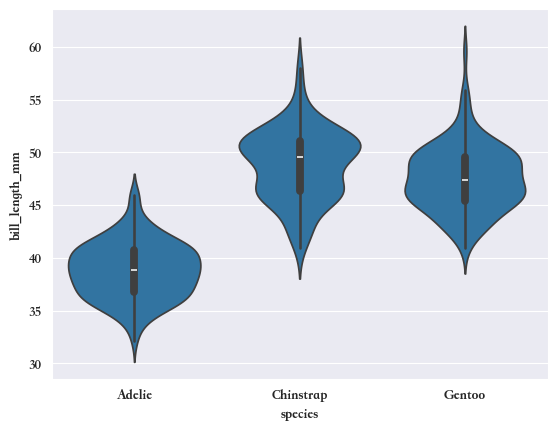

In [19]:
# 比较不同种类企鹅的喙长度分布
sns.violinplot(data=penguins, x="species", y="bill_length_mm")
plt.show()

#### 9. 成对关系图 (pairplot)

成对关系图（Pair Plot）是一个强大的工具，它会创建数据集中所有数值变量两两配对的图表矩阵。

  * **非对角线**：默认是散点图，显示变量两两之间的关系。
  * **对角线**：默认是直方图或 KDE，显示每个变量自身的分布。

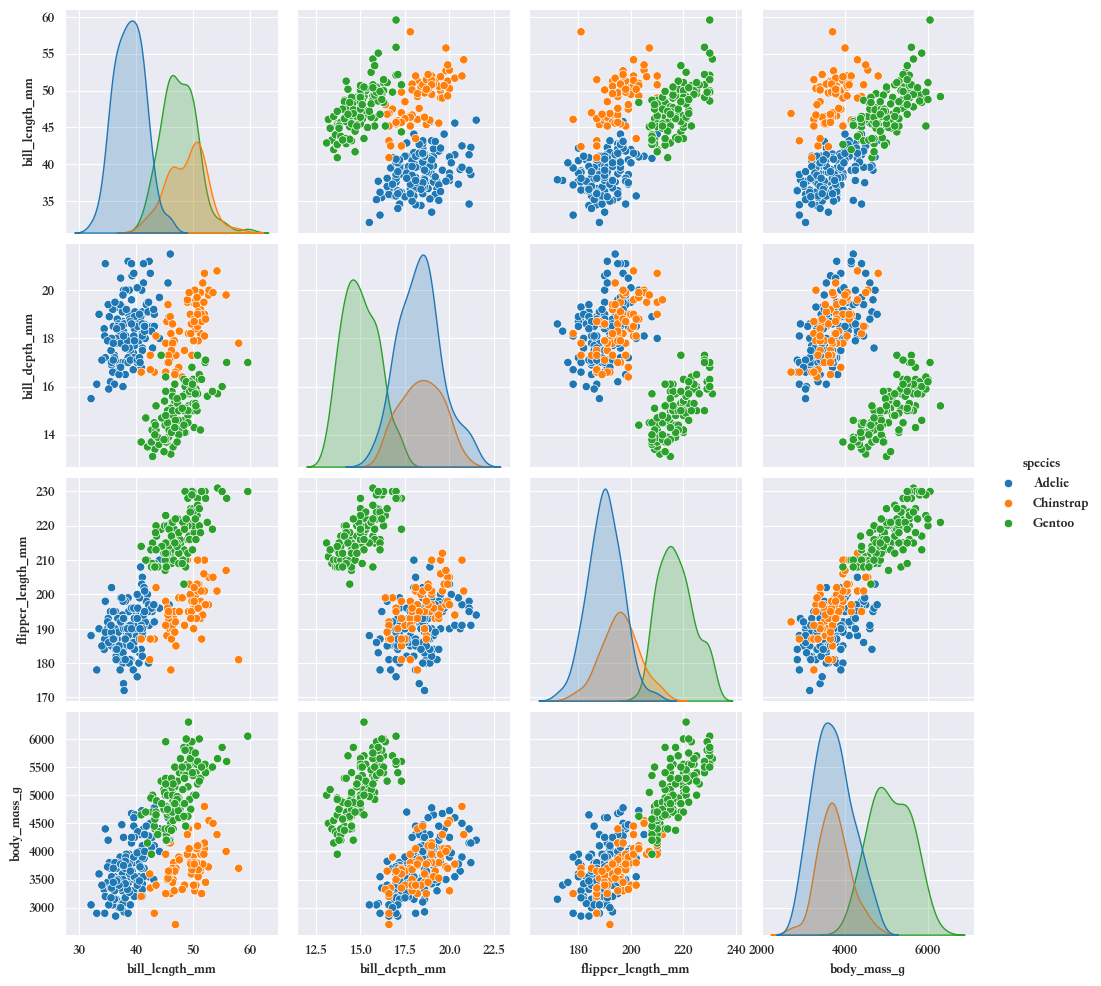

In [20]:
# 绘制数据集中所有数值变量的成对关系图
# 使用 hue="species" 按种类区分颜色
sns.pairplot(data=penguins, hue="species")
plt.show()

### 多变量可视化 (使用 `hue`)

Seaborn 的一个强大之处在于可以轻松添加第三个（甚至第四个）维度。最常用的方式是使用 `hue` 参数，它会根据一个分类变量来区分颜色。

**代码示例**

我们可以在 `violinplot` 的基础上，增加 `hue="sex"` 来同时比较不同种类和性别的企鹅。

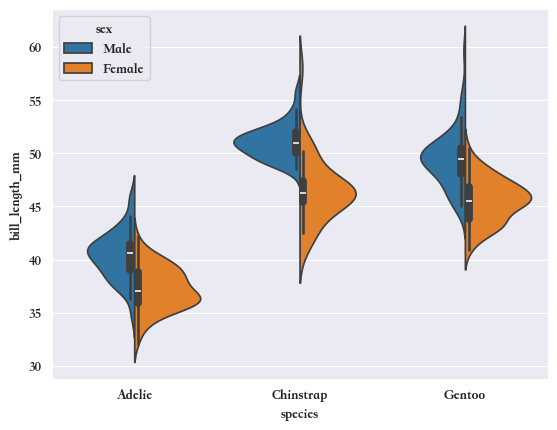

In [21]:
# x = 种类, y = 喙长度, hue = 性别
# split=True 会将同一类别下hue的两个值分到小提琴的两侧，使比较更直观
sns.violinplot(data=penguins, x="species", y="bill_length_mm", hue="sex", split=True)
plt.show()

### Seaborn 样式 (Style)

Seaborn 允许你通过 `set_style()` 快速切换图表的整体外观风格，如背景色和网格线。

常见的样式有：

  * `darkgrid`：（默认）深色网格背景
  * `whitegrid`：白色网格背景
  * `dark`：深色无网格背景
  * `white`：白色无网格背景
  * `ticks`：带刻度线的白色背景

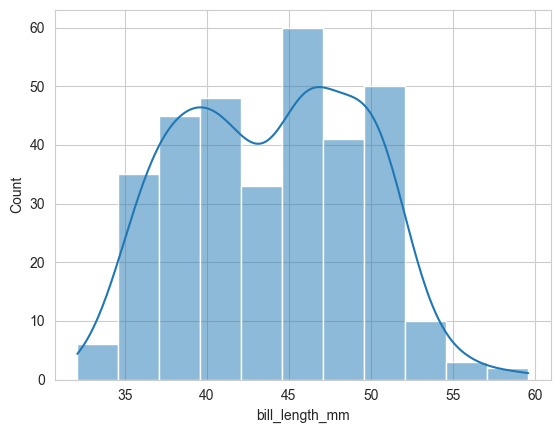

In [22]:
# 切换到 "whitegrid" 风格
sns.set_style("whitegrid")

# 重新绘制之前的直方图
sns.histplot(data=penguins, x="bill_length_mm", kde=True)
plt.show()